<a href="https://colab.research.google.com/github/cyss93/CP1_team8/blob/%EB%B0%95%EC%A3%BC%EC%98%81/retention2_220630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [3]:
older_data = pd.read_csv('/content/drive/MyDrive/olist/EDA_ALL_order_data.csv')

In [4]:
older_data['order_approved_at'] = pd.to_datetime(older_data['order_approved_at'])

In [5]:
Today = older_data['order_approved_at'].max()

In [6]:
older_data

,order_id,product_id,order_item_id,price,freight_value,seller_profit,distance,order_approved_at,seller_id
0,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,1,106.20,9.56,96.64,95.370061,2017-08-21 20:50:19,3442f8959a84dea7ee197c632cb2df15
1,50bf8a2b03e3f4c0e4ebf955b3e1860d,054515fd15bc1a2029f10de97ffa9120,1,35.00,8.94,26.06,45.691554,2018-03-08 17:30:34,e9779976487b77c6d4ac45f75ec7afe9
2,3eb03e7a4a9a9197c4f0481415bec34d,d1b8f5983d9573c8e523b8c56a59497d,1,79.90,14.31,65.59,533.424565,2017-07-25 03:35:38,0ea22c1cfbdc755f86b9b54b39c16043
3,fae6817170e0509473149b11bdb8e285,3e4176d545618ed02f382a3057de32b4,1,129.99,17.16,112.83,327.673448,2018-01-03 18:52:30,02f5837340d7eb4f653d676c7256523a
4,b3c20d53be137128e8ae69ee76a60326,bce474cc95b6e77657e10939b0b4248c,1,249.90,9.00,240.90,111.928656,2017-05-08 23:02:41,fa1c13f2614d7b5c4749cbc52fecda94
...,...,...,...,...,...,...,...,...,...
112091,59a1c1915aa1c7382762e3adae5f0877,2bc21a82809d1558515e2962e53cc4bb,1,199.90,22.87,177.03,528.680420,2017-03-19 12:12:41,21e83881401b92b49fb09a16d3852291
112092,c6ad7089d27e68a395de452a632cb54e,9019140ff0a590950d16c4e5ae5427f6,1,43.90,23.03,20.87,1156.511609,2018-08-06 15:25:14,daeb5653dd96c1b11860f72209795012
112093,06136e6a6532fabbd5675f8090fca4b3,9286aa6d0235770b570beb128f608e42,1,30.09,42.49,-12.40,1272.227698,2018-07-21 09:23:54,d66c11a9572221d92fbb8c4897db5f9b
112094,5fdab414c63ae3857866968ef3104328,5ab535a49436f1b34f5b83ca7375c4ef,1,24.12,20.12,4.00,1099.918100,2018-06-23 22:35:00,d66c11a9572221d92fbb8c4897db5f9b


In [7]:
seller_data1 = pd.DataFrame({'first_order':older_data.groupby('seller_id')['order_approved_at'].min()})
seller_data1.reset_index(inplace = True)

In [8]:
seller_data1

,seller_id,first_order
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-27 22:24:16
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:15:39
2,001e6ad469a905060d959994f1b41e4f,2018-08-07 23:05:23
3,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:10:15
4,003554e2dce176b5555353e4f3555ac8,2017-12-15 07:11:03
...,...,...
3083,ffcfefa19b08742c5d315f2791395ee5,2018-06-23 17:55:45
3084,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:30:20
3085,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 16:14:11
3086,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:25:19


In [9]:
seller_data2 = pd.DataFrame({'last_order':older_data.groupby('seller_id')['order_approved_at'].max()})
seller_data2.reset_index(inplace = True)

In [10]:
seller_data2

,seller_id,last_order
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 23:56:20
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:50:17
2,001e6ad469a905060d959994f1b41e4f,2018-08-07 23:05:23
3,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 13:11:45
4,003554e2dce176b5555353e4f3555ac8,2017-12-15 07:11:03
...,...,...
3083,ffcfefa19b08742c5d315f2791395ee5,2018-06-23 17:55:45
3084,ffdd9f82b9a447f6f8d4b91554cc7dd3,2018-08-20 12:11:53
3085,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-16 03:33:54
3086,fffd5413c0700ac820c7069d66d98c89,2018-08-26 20:10:15


In [11]:
seller_data3 = pd.DataFrame({'total_profit':older_data.groupby('seller_id')['seller_profit'].sum()})
seller_data3.reset_index(inplace = True)

In [12]:
seller_data3

,seller_id,total_profit
0,0015a82c2db000af6aaaf3ae2ecb0532,2621.94
1,001cca7ae9ae17fb1caed9dfb1094831,16225.89
2,001e6ad469a905060d959994f1b41e4f,232.06
3,002100f778ceb8431b7a1020ff7ab48f,440.84
4,003554e2dce176b5555353e4f3555ac8,100.62
...,...,...
3083,ffcfefa19b08742c5d315f2791395ee5,60.28
3084,ffdd9f82b9a447f6f8d4b91554cc7dd3,1373.74
3085,ffeee66ac5d5a62fe688b9d26f83f534,1420.17
3086,fffd5413c0700ac820c7069d66d98c89,6228.56


In [13]:
seller_data = seller_data1.merge(seller_data2, how='inner')
seller_data = seller_data.merge(seller_data3, how='inner')

In [14]:
seller_data['sale_days']=(seller_data['last_order']-seller_data['first_order']).dt.days

In [15]:
seller_data['mean_profit']=seller_data['total_profit']/(seller_data['sale_days']+1)

In [16]:
seller_data['registration_days'] = (Today - seller_data['first_order']).dt.days

In [17]:
seller_data

,seller_id,first_order,last_order,total_profit,sale_days,mean_profit,registration_days
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-27 22:24:16,2017-10-18 23:56:20,2621.94,21,119.179091,340
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:15:39,2018-07-12 21:50:17,16225.89,523,30.965439,575
2,001e6ad469a905060d959994f1b41e4f,2018-08-07 23:05:23,2018-08-07 23:05:23,232.06,0,232.060000,26
3,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:10:15,2018-04-12 13:11:45,440.84,210,2.089289,354
4,003554e2dce176b5555353e4f3555ac8,2017-12-15 07:11:03,2017-12-15 07:11:03,100.62,0,100.620000,262
...,...,...,...,...,...,...,...
3083,ffcfefa19b08742c5d315f2791395ee5,2018-06-23 17:55:45,2018-06-23 17:55:45,60.28,0,60.280000,71
3084,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:30:20,2018-08-20 12:11:53,1373.74,532,2.577373,547
3085,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 16:14:11,2018-05-16 03:33:54,1420.17,227,6.228816,338
3086,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:25:19,2018-08-26 20:10:15,6228.56,397,15.649648,405


In [18]:
# seller_data.to_csv("/content/drive/MyDrive/olist/EDA_ALL_seller_data.csv", index = False)

In [19]:
def retention(df,days,interval):
  date = list(range(interval,days+1,interval))
  df_X = df[df['registration_days']>=days]
  ret = [ len(df_X[df_X['sale_days']>=x-interval])/len(df_X) if ((len(df_X[df_X['sale_days']>=x])>0) and len(df_X)>0) else None for x in date ]
  return date, ret

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


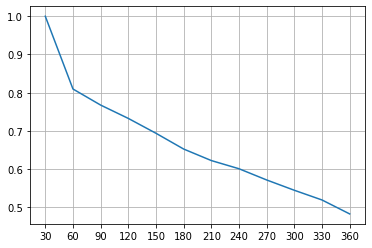

In [21]:
days = 365
interval = 30

plt.plot(retention(seller_data,days,interval)[0],retention(seller_data,days,interval)[1])
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(seller_data,days,interval)[0])

In [29]:
seller_data['mean_profit'].describe()['75%']

34.78566538528128

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


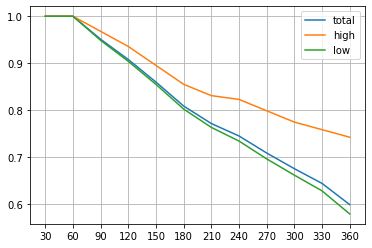

In [67]:
days = 365
interval = 30
Minimum = 30

df_total = seller_data[seller_data['sale_days']>Minimum]
df_high = seller_data[(seller_data['mean_profit']>=seller_data['mean_profit'].describe()['75%'])&(seller_data['sale_days']>Minimum)]
df_low = seller_data[(seller_data['mean_profit']<seller_data['mean_profit'].describe()['75%'])&(seller_data['sale_days']>Minimum)]

plt.plot(retention(df_total,days,interval)[0],retention(df_total,days,interval)[1])
plt.plot(retention(df_high,days,interval)[0],retention(df_high,days,interval)[1])
plt.plot(retention(df_low,days,interval)[0],retention(df_low,days,interval)[1])
plt.legend(['total', 'high', 'low'])
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(seller_data,days,interval)[0])